In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [4]:
url = "https://raw.githubusercontent.com/ben-phillips-5227/data-analyst-portfolio/main/projects/Airline_Clustering/data/AirlineDelays.csv"
df = pd.read_csv(url)

In [5]:
scaler = StandardScaler()
df = scaler.fit_transform(df.iloc[:, 0:18])
scaled = scaler.fit_transform(df)
print(scaled.shape)

(9697, 18)


In [6]:
kmeans = KMeans(n_clusters = 5, n_init = 30, random_state = 42)
kmeans.fit(scaled)

KMeans(n_clusters=5, n_init=30, random_state=42)

In [7]:
kmeans.labels_

array([1, 3, 1, ..., 1, 2, 3], dtype=int32)

In [9]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = pd.read_csv(url).columns)
print(centroids)

   FlightNum   DepTime  CRSDepTime   ArrTime  CRSArrTime  ActualElapsedTime  \
0  -0.692484 -0.163018   -0.080048  0.031089    0.083811           1.816822   
1   0.185291 -0.962267   -0.987839 -0.693987   -0.988722          -0.284974   
2   0.129864  0.618140    0.408530 -0.000295    0.367591          -0.204975   
3   0.070524  0.675389    0.723434  0.554456    0.674283          -0.385665   
4  -0.329820  0.083456    0.059437  0.359177    0.224427           0.371837   

   CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  \
0        1.847305  1.863847 -0.188821 -0.233652  1.872362  0.129773  0.092231   
1       -0.356293 -0.329983 -0.290568 -0.350239 -0.355599  0.031893  0.118273   
2       -0.162479 -0.214814  2.075341  2.010062 -0.199418  0.036271 -0.010855   
3       -0.350654 -0.363843 -0.265587 -0.182403 -0.350383 -0.083950 -0.127250   
4        0.451358  0.459791 -0.114201 -0.022723  0.480581 -0.116148 -0.244894   

   CarrierDelay  WeatherDelay  NASDela

In [10]:
inertia = kmeans.inertia_
print(inertia)

109021.2126101841


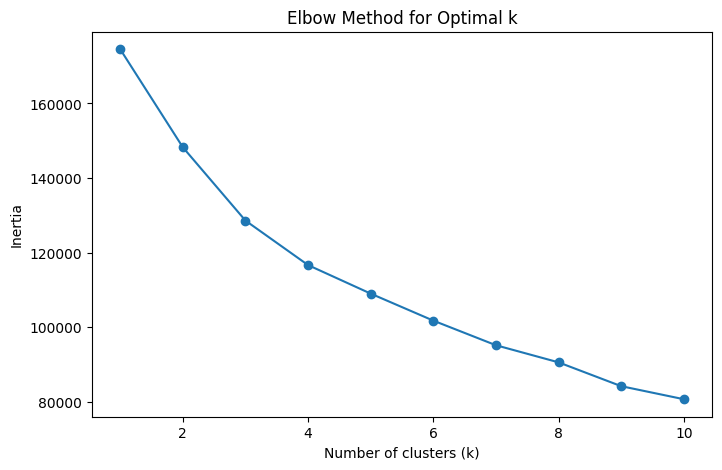

In [11]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=30, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, n_init = 30, random_state = 42)
kmeans.fit(scaled)

KMeans(n_clusters=4, n_init=30, random_state=42)

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = pd.read_csv(url).columns)
print(centroids)

   FlightNum   DepTime  CRSDepTime   ArrTime  CRSArrTime  ActualElapsedTime  \
0  -0.693208 -0.161962   -0.079255  0.032890    0.085319           1.816276   
1   0.129864  0.618140    0.408530 -0.000295    0.367591          -0.204975   
2   0.070143  0.675477    0.723514  0.554877    0.674501          -0.385258   
3   0.185881 -0.962960   -0.988625 -0.694830   -0.989683          -0.285877   

   CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  \
0        1.846974  1.863566 -0.188740 -0.233267  1.871717  0.129806  0.091054   
1       -0.162479 -0.214814  2.075341  2.010062 -0.199418  0.036271 -0.010855   
2       -0.350416 -0.363512 -0.265154 -0.182240 -0.350019 -0.084200 -0.126772   
3       -0.356922 -0.330736 -0.290799 -0.350050 -0.356189  0.031792  0.117543   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0     -0.049794     -0.065586  0.011438       0.066693          -0.206252  
1      0.692406      0.367059  0.658148      -

In [17]:
EuclDist = pdist(scaled, metric = "euclidean")
EuclDist

array([6.73532885, 2.30863084, 3.57400718, ..., 9.14570279, 6.87839976,
       5.61274788])

In [18]:
Single = linkage(EuclDist, method =  'single')
Complete = linkage(EuclDist, method =  'complete')
Average = linkage(EuclDist, method =  'average')
Ward = linkage(EuclDist, method = 'ward')

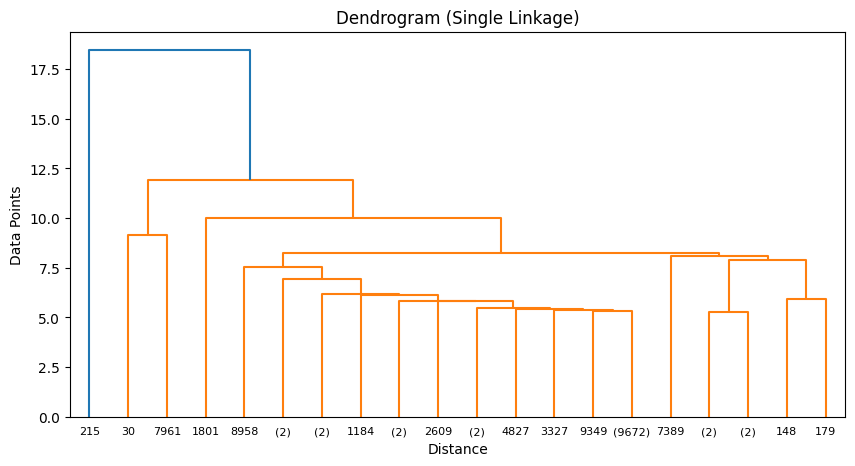

In [21]:
plt.figure(figsize=(10, 5))
dendrogram(Single, labels=pd.read_csv(url).index, truncate_mode='lastp', p=20, leaf_font_size=8)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Distance')
plt.ylabel('Data Points')
plt.show()

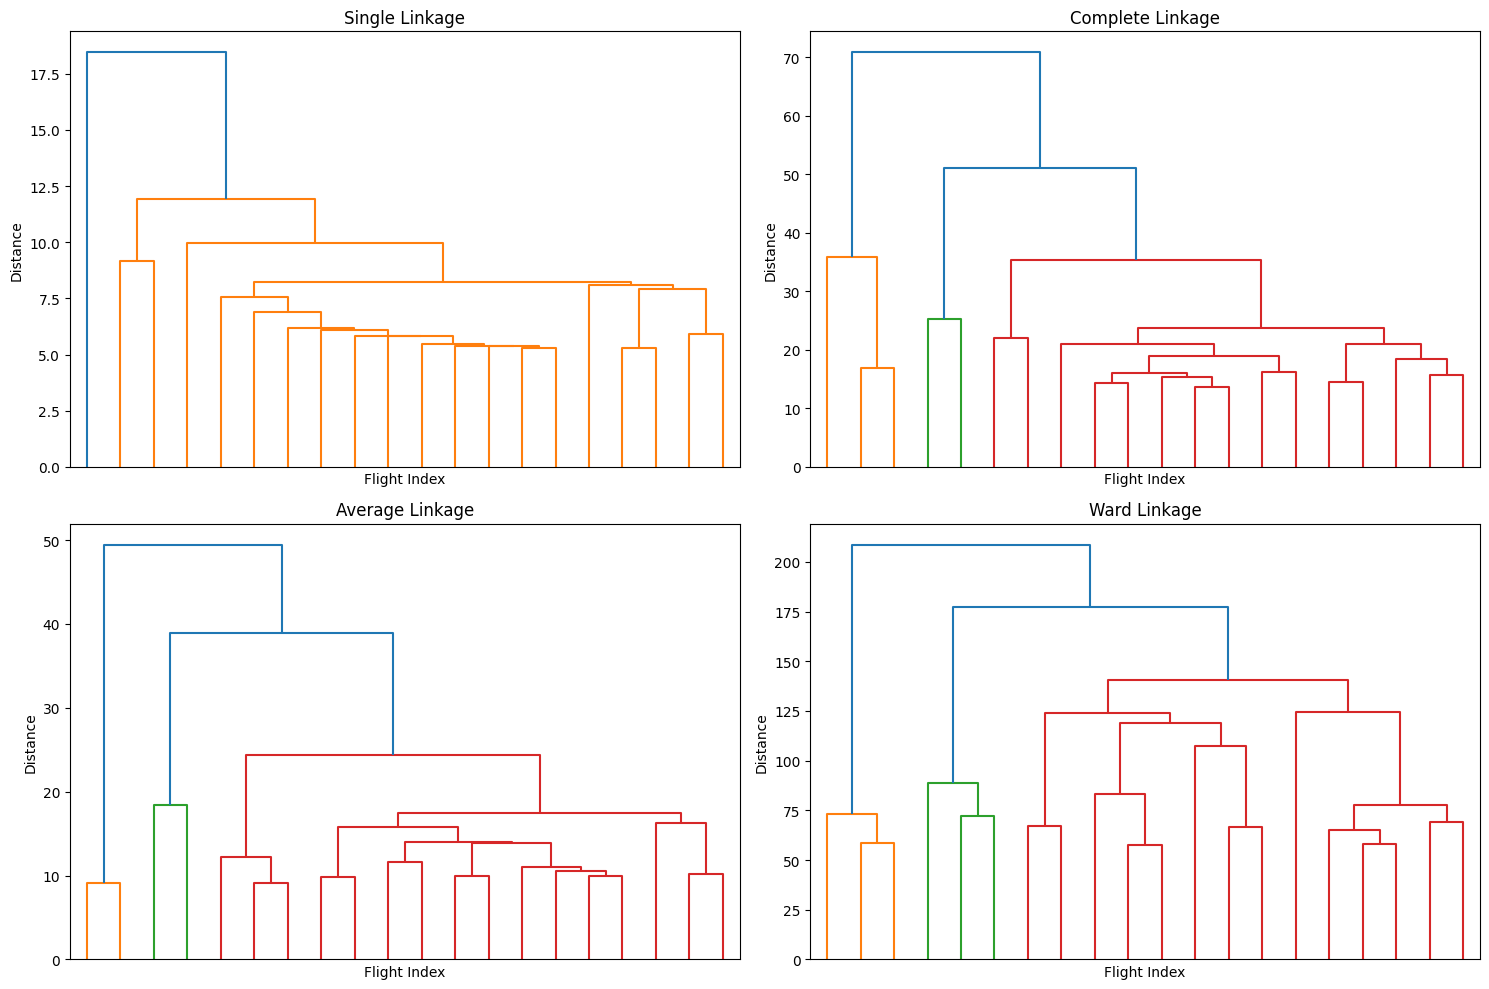

In [22]:
methods = ["single", "complete", "average", "ward"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, method in zip(axes.flat, methods):
    linked = linkage(scaled, method=method)
    dendrogram(linked, no_labels=True, truncate_mode='lastp', p=20, ax=ax)
    ax.set_title(f"{method.title()} Linkage")
    ax.set_xlabel("Flight Index")
    ax.set_ylabel("Distance")
plt.tight_layout()
plt.show()

In [23]:
clusters = fcluster(Ward, 4, criterion="maxclust")
pd.Series(clusters).value_counts().sort_index()

,count
1,1259
2,2626
3,1916
4,3896


In [24]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = pd.read_csv(url).columns)
print(centroids)

   FlightNum   DepTime  CRSDepTime   ArrTime  CRSArrTime  ActualElapsedTime  \
0  -0.693208 -0.161962   -0.079255  0.032890    0.085319           1.816276   
1   0.129864  0.618140    0.408530 -0.000295    0.367591          -0.204975   
2   0.070143  0.675477    0.723514  0.554877    0.674501          -0.385258   
3   0.185881 -0.962960   -0.988625 -0.694830   -0.989683          -0.285877   

   CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  \
0        1.846974  1.863566 -0.188740 -0.233267  1.871717  0.129806  0.091054   
1       -0.162479 -0.214814  2.075341  2.010062 -0.199418  0.036271 -0.010855   
2       -0.350416 -0.363512 -0.265154 -0.182240 -0.350019 -0.084200 -0.126772   
3       -0.356922 -0.330736 -0.290799 -0.350050 -0.356189  0.031792  0.117543   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0     -0.049794     -0.065586  0.011438       0.066693          -0.206252  
1      0.692406      0.367059  0.658148      -